# <center> Unsupervised Learning Methods </center>
## <center> Problem Set IV </center>
### <center> t-SNE and (Geometric) Domain Adaptation </center>

This notebook contains the **domain adaptation** part.  
See the second notebook for the **t-SNE** part.

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

# 2. Geometric Domain Adaptation
**The original datasets (datasets 2a):**  
http://www.bbci.de/competition/iv/#dataset2a

**Download from here:** [BciData.npz](https://drive.google.com/file/d/13KPmsZ9Sr4lux6R5MOLvt3LzdaOpTBAc/view?usp=sharing)

#### Load and plot the dataset:

In [3]:
dData = np.load('BciData.npz')
mX1   = dData['mX1']
mX2   = dData['mX2']
vY1   = dData['vY1']
vY2   = dData['vY2']

mX    = np.concatenate([mX1, mX2])
vY    = np.concatenate([vY1, vY2])

print(f'Day I:   mX1.shape = {mX1.shape}')
print(f'Day I:   vY1.shape = {vY1.shape}')
print(f'Day II:  mX2.shape = {mX2.shape}')
print(f'Day II:  vY2.shape = {vY2.shape}')
print(f'Combine: mX .shape = {mX .shape}')
print(f'Combine: vY .shape = {vY .shape}')

Day I:   mX1.shape = (287, 1000, 22)
Day I:   vY1.shape = (287,)
Day II:  mX2.shape = (288, 1000, 22)
Day II:  vY2.shape = (288,)
Combine: mX .shape = (575, 1000, 22)
Combine: vY .shape = (575,)


In [4]:
lLabel = ['Left hand', 'Right hand', 'Foot', 'Tongue'] #-- The labels

#-- N = Samples, T = Time, C = Channels
N1, T, C = mX1.shape
N2, _, _ = mX2.shape
N,  _, _ = mX .shape

#### Run the cell below several times

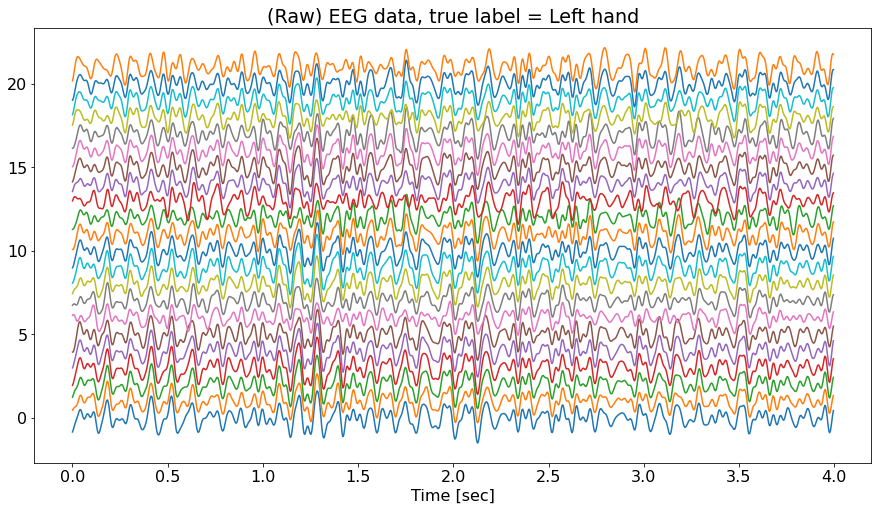

In [8]:
def PlotRandomSample(mX, vY):
    N, T, C = mX.shape #-- Samples, Time, Channels
    idx     = np.random.randint(N)
    mXi     = mX[idx,:,:].copy()
    yi      = vY[idx]
    
    #--  Just for plotting:
    mXi -= mXi.mean(0)
    mXi /= 20
    mXi += np.arange(C)[None,:]
    vT   = np.linspace(0, 4, T, endpoint=False)
    
    plt.figure(figsize=(15, 8))
    plt.plot  (vT, mXi)
    plt.title (f'(Raw) EEG data, true label = {lLabel[yi]}')
    plt.xlabel('Time [sec]')

PlotRandomSample(mX1, vY1)
plt.show()

## 2.6 Analyzing a single day (day I)
### Raw data - Euclidean metric
The cell below applies several dimensionality reduction methods to the raw EEG data (from day I).  
As you can see (after running the cell), the different labels do not form uniform clusters.

**Note:**
* Consider installing `UMAP`:<br>https://umap-learn.readthedocs.io/en/latest/  
(If not, omit this option)

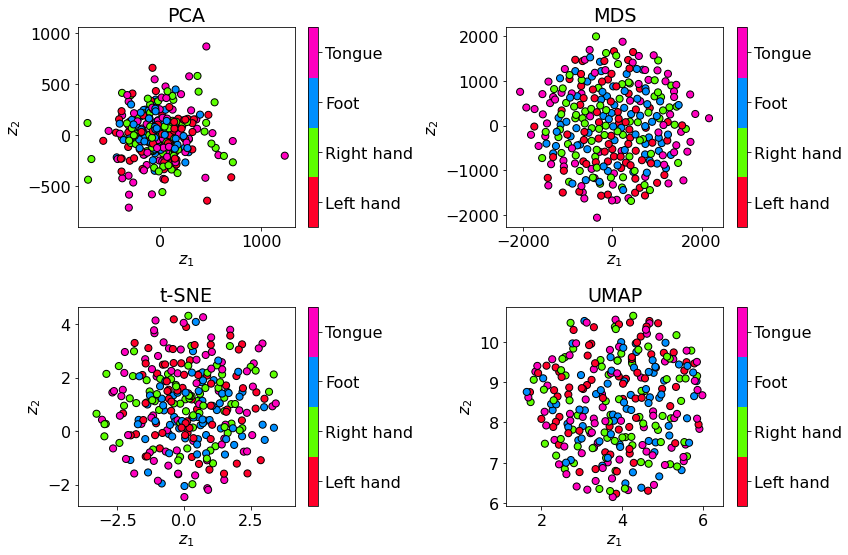

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold      import MDS, TSNE
from umap                  import UMAP
from matplotlib.cm         import get_cmap

lMethods  = []
lMethods += [(PCA (n_components=2), 'PCA'  )]
lMethods += [(MDS (n_components=2), 'MDS'  )]
lMethods += [(TSNE(n_components=2), 't-SNE')]
lMethods += [(UMAP(n_components=2), 'UMAP' )]

mX1A   = mX1.reshape((N1, -1))
fig, _ = plt.subplots(2, 2, figsize=(12, 8))
for (oMethod, name), ax in zip(lMethods, fig.axes):
    mZ = oMethod.fit_transform(mX1A)
    
    h = ax.scatter(*mZ.T, s=50, c=vY1, edgecolor='k', vmin=-1/2, vmax=3.5, cmap=get_cmap('gist_rainbow', 4))
    ax.set_title  (name)
    ax.set_xlabel ('$z_1$')
    ax.set_ylabel ('$z_2$')
    ax.axis       ('equal')
    plt.colorbar  (h, ax=ax, ticks=range(4)).ax.set_yticklabels(lLabel)   

plt.tight_layout()
plt.show        ()

---

### 2.6.1
* Implement the following (short) `ComputeCovs` function.  
* **2% Bonus:** Do not use loops.

In [6]:
def ComputeCovs(mX):
    '''
    ========================================================================
    The funciton computes the covariances of the input data
    Args:
        mX    - Input data,    mX   .shape = (N, T, C)
    Output:
        mCovs - N covariances, mCovs.shape = (N, C, C)
    ========================================================================
    '''
    
    '''
    ==============================================
    Write your code below.
    It should be 1-5 lines of code
    ==============================================
    '''
    pass

    return mCovs

---

### 2.6.2  Covariances - Euclidean metric
* Apply the different dimensionality reduction methods to the covariances `mCovs1` instead of the raw data `mX1`.
* Remember to reshape `mCovs1`.
* Fill the missing `???`.
* You should get slightly better results.

In [7]:
mCovs1 = ComputeCovs(mX1)

In [6]:
fig, _ = plt.subplots(2, 2, figsize=(12, 8))
for (oMethod, name), ax in zip(lMethods, fig.axes):
    mZ = oMethod.fit_transform(???)
    
    h = ax.scatter(*mZ.T, s=50, c=vY1, edgecolor='k', vmin=-1/2, vmax=3.5, cmap=get_cmap('gist_rainbow', 4))
    ax.set_title  (name)
    ax.set_xlabel ('$z_1$')
    ax.set_ylabel ('$z_2$')
    ax.axis       ('equal')
    ax.set_yticks ([])
    plt.colorbar  (h, ax=ax, ticks=range(4)).ax.set_yticklabels(lLabel)   

plt.tight_layout()
plt.show        ()

SyntaxError: invalid syntax (<ipython-input-6-ba3e0cd06ffd>, line 3)

### 2.6.3 Covariances - SPD metric (geodesic distance)
Implement the `SpdMetric` function:
$$d\left(\boldsymbol{P},\boldsymbol{Q}\right)=\sqrt{\sum_{i=1}^{d}\log^{2}\left(\lambda_{i}\left(\boldsymbol{P}^{-1}\boldsymbol{Q}\right)\right)}$$
* Do not invert any matrix.
* Use `scipy.linalg.eigvalsh`.

In [9]:
from scipy.linalg import eigvalsh

def SpdMetric(P, Q):
    '''
    ========================================================================
    The funciton computes the geodesic distance between two SPD matrices.
    Args:
        P    - An SPD matrix,         P.shape = (d, d)
        Q    - An SPD matrix,         Q.shape = (d, d)
    Output:
        dist - The geodesic distance, dist ≥ 0
    ========================================================================
    '''
    
    '''
    ==============================================
    Write your code below.
    It should be 1-3 lines of code
    ==============================================
    '''
    pass
    
    return dist

#### Computes pair-wise SPD distances:

In [10]:
def ComputePairwiseDistance(mCovs):
    N  = mCovs.shape[0]
    mD = np.zeros((N, N))
    for ii in range(N):
        for jj in range(N):
            if jj > ii:
                continue
            mD[ii,jj] = SpdMetric(mCovs[ii], mCovs[jj])

    mD = mD + mD.T
    return mD

#### `SpdMetricAux`
Gets the column stack representation of two SPD matrices and computes the `SpdMetric` between them.

In [11]:
def SpdMetricAux(vP, vQ):
    d2 = len(vP)
    d  = np.sqrt(d2).astype(np.int)
    mP = np.reshape(vP, (d, d))
    mQ = np.reshape(vQ, (d, d))
    
    return SpdMetric(mP, mQ)

* Apply the different dimensionality reduction methods to the covariances `mCovs1`.
* Use the geodesic distance between your covariances:
    * For `MDS` - use the `precomputed` option with `mD1`.
    * For `t-SNE`\\`UMAP` -  use `SpdMetricAux`.
* Remember to reshape `mCovs1`.
* Fill the missing `???`.
* You should get much better results.

In [7]:
mD1       = ComputePairwiseDistance(mCovs1)

lMethods  = []
lMethods += [(MDS (n_components=2, dissimilarity=???), 'MDS'  )]
lMethods += [(TSNE(n_components=2, metric=???       ), 't-SNE')]
lMethods += [(UMAP(n_components=2, metric=???       ), 'UMAP' )]

fig, _ = plt.subplots(2, 2, figsize=(12, 8))
for (oMethod, name), ax in zip(lMethods, fig.axes):
    if name == 'MDS':
        mZ = oMethod.fit_transform(???)
    else:
        mZ = oMethod.fit_transform(???)
    
    h = ax.scatter(*mZ.T, s=50, c=vY1, edgecolor='k', vmin=-1/2, vmax=3.5, cmap=get_cmap('gist_rainbow', 4))
    ax.set_title  (name)
    ax.set_xlabel ('$z_1$')
    ax.set_ylabel ('$z_2$')
    ax.axis       ('equal')
    plt.colorbar  (h, ax=ax, ticks=range(4)).ax.set_yticklabels(lLabel)   
    
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-7-ea0b58e5a8a8>, line 4)

## Domain adaptation
### 2.7.1 No adaptation
* Use `mX`, the combine data, and repeat the same dimensionality reduction process (`MDS`, `t-SNE`, `UMAP`).
* Use the geodesic metric (`SpdMetric`) as before.
* Fill the missing `???`.
* You should see two major clusters (one per day).

In [11]:
mCovs = ComputeCovs(mX)
mD    = ComputePairwiseDistance(mCovs)

NameError: name 'ComputeCovs' is not defined

In [8]:
lMethods  = []
lMethods += [(MDS (n_components=2, dissimilarity=???), 'MDS'  )]
lMethods += [(TSNE(n_components=2, metric=???       ), 't-SNE')]
lMethods += [(UMAP(n_components=2, metric=???       ), 'UMAP' )]

vIdx1  = np.arange(N) < N1
vIdx2  = np.arange(N) >= N1
fig, _ = plt.subplots(2, 2, figsize=(12, 8))
for (oMethod, name), ax in zip(lMethods, fig.axes):
    if name == 'MDS':
        mZ = oMethod.fit_transform(???)
    else:
        mZ = oMethod.fit_transform(???)
    
    h = ax.scatter(*mZ[vIdx1,:].T, s=50, c=vY1, edgecolor='k', vmin=-1/2, vmax=3.5, cmap=get_cmap('gist_rainbow', 4), label='Day I' )
    h = ax.scatter(*mZ[vIdx2,:].T, s=50, c=vY2, marker='*',    vmin=-1/2, vmax=3.5, cmap=get_cmap('gist_rainbow', 4), label='Day II')
    ax.set_title  (name)
    ax.set_xlabel ('$z_1$')
    ax.set_ylabel ('$z_2$')
    ax.axis       ('equal')
    ax.legend     ()
    plt.colorbar  (h, ax=ax, ticks=range(4)).ax.set_yticklabels(lLabel)   
    
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-8-c741650a96f0>, line 2)

### 2.7.2 Riemannian SPD mean
* Implement the `SpdMean` function.
* See the lecture notes (the Fréchet mean algorithm).
* Implement the two auxiliary functions (see lecture notes):
    1. $\mathrm{Log}_{\boldsymbol{X}}\left(\boldsymbol{Y}\right)$
    2. $\mathrm{Exp}_{\boldsymbol{X}}\left(\boldsymbol{S}\right)$
    * Use `from scipy.linalg import logm, expm, sqrtm`.

In [5]:
from scipy.linalg import logm, expm, sqrtm

def Log(X, Y):
    '''
    ==============================================
    Write your code below.
    It should be 1-3 lines of code
    ==============================================
    '''

    return S

def Exp(X, S):
    '''
    ==============================================
    Write your code below.
    It should be 1-3 lines of code
    ==============================================
    '''

    return Y

def SpdMean(mP, ε=1e-6):
    '''
    ========================================================================
    Given a set of SPD matrcies, the funciton computes its Riemannian mean.
    Args:
        mP - A set of SPD matrices, mP.shape = (N, d, d)
    Output:
        M  - The Riemannian mean,   M.shape  = (d, d)
    ========================================================================
    '''
    
    '''
    ==============================================
    Write your code below.
    It should be ~10 lines of code
    ==============================================
    '''
    
    return M

#### Compute the SPD mean of day I and day II:

In [10]:
mCovs2 = ComputeCovs(mX2)
M1     = SpdMean(mCovs1)
M2     = SpdMean(mCovs2)

NameError: name 'ComputeCovs' is not defined

### 2.7.3 Apply Parallel Transport (PT)
* Apply PT and transport the set of SPD matrices of day 1 `mCovs1` from `M1` to `M2`:
$$\widetilde{\boldsymbol{X}}_{i}=\mathrm{P}_{\boldsymbol{M}_{1}\to\boldsymbol{M}_{2}}\left(\boldsymbol{X}_{i}\right)=\boldsymbol{E}\boldsymbol{X}_{i}\boldsymbol{E}^{T}$$
where $\boldsymbol{E}=\left(\boldsymbol{M}_{2}\boldsymbol{M}_{1}^{-1}\right)^{\frac{1}{2}}$

**Hint:** Use broadcasting to compute $\boldsymbol{E}\boldsymbol{X}_{i}\boldsymbol{E}^{T}$ for all $i$ at once.

In [11]:
E        = ??? #-- Compute E (in a single line)
mCovsPT1 = ??? #-- Apply PT  (in a single line)
mCovsPT  = np.concatenate([mCovsPT1, mCovs2])

SyntaxError: invalid syntax (<ipython-input-11-f9bca1c02d01>, line 1)

#### Run the cells below to test your implementation

In [19]:
mDPT = ComputePairwiseDistance(mCovsPT)
mCPT = mCovsPT.reshape((N, -1))

In [12]:
lMethods  = []
lMethods += [(MDS (n_components=2, dissimilarity='precomputed'), 'MDS'  )]
lMethods += [(TSNE(n_components=2, metric=SpdMetricAux        ), 't-SNE')]
lMethods += [(UMAP(n_components=2, metric=SpdMetricAux        ), 'UMAP' )]

fig, _ = plt.subplots(2, 2, figsize=(12, 8))
for (oMethod, name), ax in zip(lMethods, fig.axes):
    if name == 'MDS':
        mZ = oMethod.fit_transform(mDPT)
    else:
        mZ = oMethod.fit_transform(mCPT)
    
    h = ax.scatter(*mZ[vIdx1,:].T, s=50, c=vY1, edgecolor='k', vmin=-1/2, vmax=3.5, cmap=get_cmap('gist_rainbow', 4), label='Day I' )
    h = ax.scatter(*mZ[vIdx2,:].T, s=50, c=vY2, marker='*',    vmin=-1/2, vmax=3.5, cmap=get_cmap('gist_rainbow', 4), label='Day II')
    ax.set_title  (name)
    ax.set_xlabel ('$z_1$')
    ax.set_ylabel ('$z_2$')
    ax.axis       ('equal')
    ax.legend     ()
    plt.colorbar  (h, ax=ax, ticks=range(4)).ax.set_yticklabels(lLabel)   
    
plt.tight_layout()
plt.show        ()

NameError: name 'MDS' is not defined